In [2]:
import pandas as pd
import seaborn as sns

In [3]:
#Reading trajectory file
def load_file(file_path):
    try:
        data = []
        with open(file_path,'r') as fp:
            for line in fp:
                line_list = line.split()
                if 'ITEM' not in line and len(line_list) > 3:
                    data.append([float(num) for num in line_list])
        print('File operation finished.')
        return data
    except FileExistError:
        print('File does not exist')

In [14]:
def create_dataframe(data):
    df = pd.DataFrame(data,columns=['id','Type','x','y','z','vx','vy','vz'])
    df[['Type','id']] = df[['Type','id']].astype(int)
    print(f'Length of dataframe: {len(df)}')
    return df

def combine_dataframe(df_1,df_2):
    df = pd.concat([df_1, df_2], ignore_index=True, sort=False)
    print(f'Length of dataframe: {len(df)}')
    return df

def load_existing_dataframe(csv_file_path):
    df = pd.read_csv(csv_file_path)
    print(f'Length of dataframe: {len(df)}')
    return df

def remove_duplicate(df,cols=['Type','x','y','z']):
    boolean = df.duplicated(subset=cols).any()
    orig_count = len(df)
    updated_col = len(df)
    if boolean:
        df = df.drop_duplicates(subset=cols)
        updated_col = len(df)
        
    print(f'No Of rows removed:{orig_count - updated_col}')
    print(f'Length of dataframe: {len(df)}')
    return df
        

def save_dataframe_csv_file(df,csv_file_name,remove_cols=[]):
    if len(remove_cols) > 0:
        df = df.drop(remove_cols,axis=1) 
    #re-indexing id col
    for i,row in df.iterrows():
        row['id'] = i+1
    #saving file
    df.to_csv(csv_file_name,index=False)

def divide_dataframe(df,criteria=['Type']):
    df_list_diff_types = []
    for num in df['Type'].unique():
        df_ = df[df['Type'] == num]
        save_dataframe_csv_file(df_,'ice_pimd_data_type_'+str(num)+'.csv',['vx','vy','vz'])
    return df_list_diff_types
    
    
def vizualize_col(df):
    sns.countplot(x=df['Type'])

In [5]:
#creating new dataframe from trajectory file
file_name = 'ice_pimd_1000_fs.xyz'
data = load_file(file_name)
df = create_dataframe(data)

File operation finished.
Length of dataframe: 1344


In [15]:
remove_duplicate(df)

No Of rows removed:0
Length of dataframe: 1344


,id,Type,x,y,z,vx,vy,vz
0,1,1,11.83000,2.56000,2.18000,0.000000e+00,0.000000e+00,0.000000e+00
1,2,1,5.36000,6.00000,1.81000,0.000000e+00,0.000000e+00,0.000000e+00
2,3,1,12.17000,7.34000,2.71000,0.000000e+00,0.000000e+00,0.000000e+00
3,4,1,3.38000,4.28000,4.84000,0.000000e+00,0.000000e+00,0.000000e+00
4,5,1,4.54000,11.73000,11.90000,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
1339,188,2,9.56714,8.23030,8.48161,-5.697100e-18,2.153820e-17,-5.402100e-17
1340,189,2,9.26365,2.72868,6.80268,-5.012930e-17,2.457480e-17,6.634720e-17
1341,190,2,2.95461,4.23025,5.12024,-1.124010e-17,2.703870e-17,1.952010e-17
1342,191,2,8.15936,3.75392,6.14392,-5.138380e-17,-2.340470e-17,-2.692440e-17


In [6]:
df.max(axis=0)

id      192.0000
Type      2.0000
x        12.2757
y        12.4400
z        12.4601
vx       53.2698
vy       59.7124
vz       59.2963
dtype: float64

In [7]:
df.min(axis=0)

id       1.000000
Type     1.000000
x        0.184366
y        0.060000
z        0.210000
vx     -92.717700
vy     -60.662400
vz     -51.096400
dtype: float64

In [8]:
df.head(5)

,id,Type,x,y,z,vx,vy,vz
0,1,1,11.83,2.56,2.18,0.0,0.0,0.0
1,2,1,5.36,6.00,1.81,0.0,0.0,0.0
2,3,1,12.17,7.34,2.71,0.0,0.0,0.0
3,4,1,3.38,4.28,4.84,0.0,0.0,0.0
4,5,1,4.54,11.73,11.90,0.0,0.0,0.0


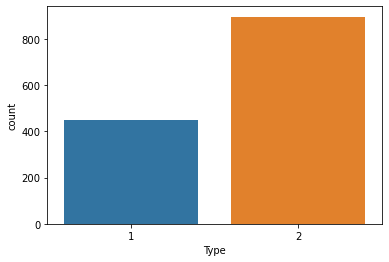

In [9]:
vizualize_col(df)

In [34]:
#combining existing csv file
csv_file_path = 'ice_pimd_md_initial_data.csv'
df_exist = load_existing_dataframe(csv_file_path)
df = combine_dataframe(df,df_exist)

Length of dataframe: 1493770
Length of dataframe: 2238770


In [35]:
#removing duplicate
df = remove_duplicate(df)

No Of rows removed:20417
Length of dataframe: 2218353


In [10]:
save_dataframe_csv_file(df,'ice_pimd_simulation_data.csv',['vx','vy','vz'])

In [34]:
df.tail(5)

,id,Type,x,y,z,vx,vy,vz
10995,996,2,11.774500,1.036880,9.94577,0.244616,5.03958,3.863400
10996,997,2,-0.733702,1.212590,7.81896,-5.033550,20.01050,-12.611800
10997,998,2,8.789730,1.418700,9.96636,-1.118120,4.44297,-0.875116
10998,999,2,0.502145,9.055250,3.75547,-18.526300,-11.28860,-7.749790
10999,1000,2,11.104000,-0.391373,7.65959,-0.392494,-7.62708,-6.868420


In [1]:
#lammps data file creation
import numpy as np

# Number of atoms to create
natoms = 1000

# Size of the system cell in Angstroms
#assuming an cubic cell, starting at the origin
system_size = 20.0

# Generate atom positions
#Randomness for amorphous glass
positions = []
for i in range(natoms):
    positions.append(np.random.rand(3)*system_size)
# Write LAMMPS data file
with open('ice_'+str(natoms)+'.data','w') as fdata:
    # First line is a comment line 
    fdata.write('Random atoms - written for EnCodeVentor tutorial\n\n')
    #--- Header ---#
    # Specify number of atoms and atom types 
    fdata.write('{} atoms\n'.format(natoms))
    fdata.write('{} atom types\n'.format(1))
    # Specify box dimensions
    fdata.write('{} {} xlo xhi\n'.format(0.0, system_size))
    fdata.write('{} {} ylo yhi\n'.format(0.0, system_size))
    fdata.write('{} {} zlo zhi\n'.format(0.0, system_size))
    fdata.write('\n')
    
    # Atoms section
    fdata.write('Atoms\n\n')
    
    # Write each position 
    for i,pos in enumerate(positions):
        fdata.write('{} 1 {} {} {}\n'.format(i+1,*pos))